## **Understanding Recurrent Neural Networks**

In [1]:
#Numpy implementation of a simple RNN
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features)) # input data: a random noise
state_t = np.zeros((output_features,)) #initial state: all zero vector
#creating random weights and biasess
w = np.random.random((output_features, input_features))
u = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(w,input_t)+np.dot(u, state_t)+b) #combines the input with current state to obtain the current output
    successive_outputs.append(output_t)
    state_t = output_t #updates the state of the network for next timestep
final_output_sequence = np.concatenate(successive_outputs, axis=0)
print(final_output_sequence,final_output_sequence.shape)

[0.99999923 0.9999998  0.99999976 ... 1.         1.         1.        ] (6400,)


### **A recurrent layer in keras**
The process we naively implemented in ```Numpy``` corresponds to an actual ```Keras``` layer: ```SimpleRNN```. For the rest of the notebook we are going to use this ```SimpleRNN``` layer.

The advantage of using ```SimpleRNN``` is, it processes batches of sequences, like all other ```Keras``` layers, where as in the previous ```Numpy``` example, we process only a single sequence.

So, the input shape changes from 
```python
(timesteps, input_ features) -> (batch_size, timesteps, input_features)
```

Also, it provides benefit to work on two different mode:
1. Full sequences of successive outputs for each timestep ```(batch_size, timesteps, output_features)```
2. Only the last output for each input sequences ```(batcH_size, output_features)```

But How??🤔

Ans:- By controlling the ```return_sequences``` of the constructor argument.

In [2]:
#Importing SimpleRNN from Keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

#Demo Model
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Now, Let's see how to return the full state sequence...

In [3]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


We can also stack several recurrent layers. If we want to get all of the intermediate layers to return full sequences of outputs, we can do the following:

In [4]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now, let's use such a model on the IMDB movie-review-classification problem...

### **Preparing the IMDB data**

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences

max_features = 20000 # Number of words to consider as features
maxlen = 1000 # Cuts off texts after this many words
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen = maxlen)
input_test = pad_sequences(input_test, maxlen = maxlen)

print('input train shape:', input_train.shape)
print('input test shape:', input_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train_sequences
25000 test_sequences
Pad sequences (samples x time)
input train shape: (25000, 1000)
input test shape: (25000, 1000)


### **Training the model with SimpleRNN**
Here, We are going to train a simple recurrent network using an `EmbeddingLayer` and a `SimpleRNN` layer.



In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.summary()
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = batch_size, validation_split = 0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          640000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 642,080
Trainable params: 642,080
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 365s 1s/step - loss: 0.6948 - acc: 0.5023 - val_loss: 0.6931 - val_acc: 0.5106
Epoch 2/10
313/313 [==============================] - 358s 1s/step - loss: 0.6925 - acc: 0.5153 - val_loss: 0.6923 - val_acc: 0.5194
Epoch 3/10
313/313 [==============================] - 346s 1s/step - loss: 0.6912 - acc: 0.5227 - val_loss: 0.6911 - val_acc: 0.5222
Epoch 4/10
313/313 [=========================

### **Plotting Results**


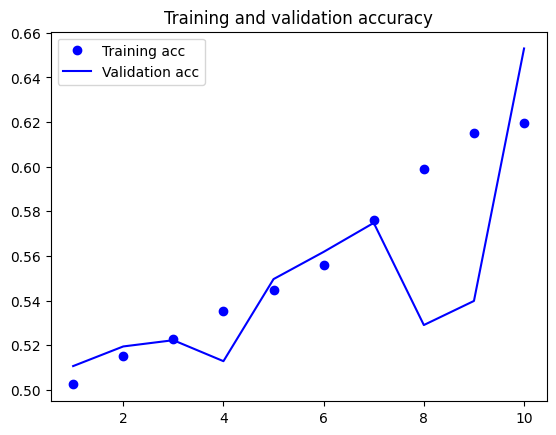

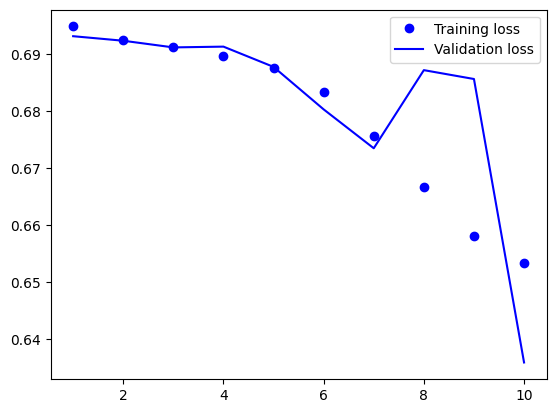

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()

plt.show()

This shows the double [Descents in DeepNets](https://arxiv.org/abs/1812.11118).

Now Let's compare the other two models we have defined...

### Model2: **return_sequences = True**

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = batch_size, validation_split = 0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          640000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 644,160
Trainable params: 644,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 675s 2s/step - loss: 0.6941 - acc: 0.5139 - val_loss: 0.6891 - val_acc: 0.5362
Epoch 2/10
313/313 [==============================] - 650s 2s/step - loss: 0.6874 - acc: 0.5416 - val_loss: 0.6802 - val_acc: 0.5780
Epoch 3/10
313/313 [==========================

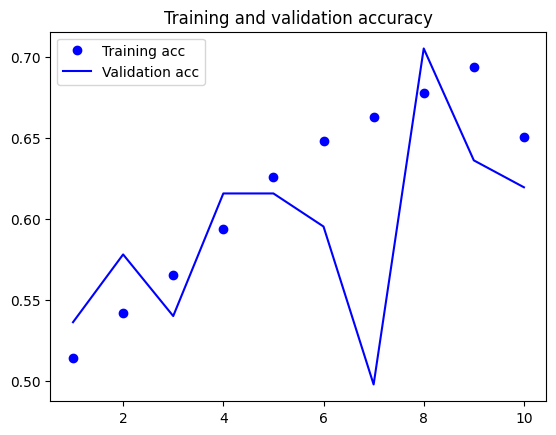

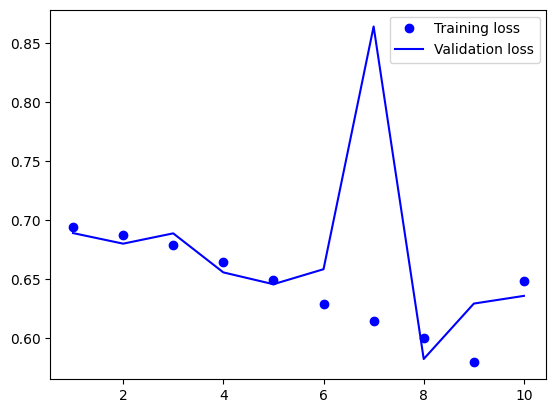

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()

plt.show()

**Model 3: Stacking Recurrent Layers**

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = batch_size, validation_split = 0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          640000    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 650,400
Trainable params: 650,400
Non-tr

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()

plt.show()